# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
import math
from datetime import date

# call today date to show the date when the results were run
# as the temperture is changing realtime
today = date.today()

# create this fucntion to round up and get a nice x-axis and y-axis labels
def round_up(var):
    return int(math.ceil(var / 10.0)) * 10

def round_dn(var):
    return int(math.floor(var / 10.0)) * 10

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
cities = [citi.title() for citi in cities]
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# create base url for API access
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# create empty list to hold each city parameters and group data set
weather_response_master =[]
lat = []
lng = []
cloudi_n = []
country = []
date = []
humid =[]
maxtemp = []
wind_spd =[]
count = 0 
set = 1
invalid_ct = 0

# specify what unit system to be used
units = "imperial"


# looping to store data

print("BEGINNING DATA RETRIEVAL ...\n\
=========================================================")
for each_city in cities:
    city = each_city
    Qry_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response_each_city = requests.get(Qry_url).json()

    if weather_response_each_city['cod'] == '404':
        print(f'City \033[1;34m"{each_city}"\033[00m \033[1;31mNOT FOUND !!! \033[00m Skipping...')
        invalid_ct += 1
    else:
        count += 1
        if count <50:
            set = set
        else:
            set = set + 1
            count = 1
        weather_response_master.append(weather_response_each_city)
        print(f'Processing\033[1;34m Records # {count}\033[00m of \033[1;34mSet # {set}\033[00m | \033[1;32m{each_city}\033[00m')
        lat.append(weather_response_each_city['coord']['lat'])
        lng.append(weather_response_each_city['coord']['lon'])
        cloudi_n.append(weather_response_each_city['clouds']['all'])
        country.append(weather_response_each_city['sys']['country']) 
        date.append(weather_response_each_city['dt']) 
        humid.append(weather_response_each_city['main']['humidity']) 
        maxtemp.append(weather_response_each_city['main']['temp_max']) 
        wind_spd.append(weather_response_each_city['wind']['speed'])

print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print(f'There are: \033[1;34m{invalid_ct}\033[00m cities with \033[1;31mNO RECORDS\033[00m.')
print('=-=-=-=-=-=-=-=-=END OF DATA RETRIEVAL-=-=-=-=-=-=-=-=')      

BEGINNING DATA RETRIEVAL ...
Processing Records # 1 of Set # 1 | Busselton
Processing Records # 2 of Set # 1 | Saint George
Processing Records # 3 of Set # 1 | Hermanus
City "Masjed-E Soleyman" NOT FOUND !!!  Skipping...
Processing Records # 4 of Set # 1 | Ushuaia
Processing Records # 5 of Set # 1 | Mataura
Processing Records # 6 of Set # 1 | Gumdag
Processing Records # 7 of Set # 1 | Bambous Virieux
Processing Records # 8 of Set # 1 | Aguimes
City "Sentyabrskiy" NOT FOUND !!!  Skipping...
Processing Records # 9 of Set # 1 | Vardo
Processing Records # 10 of Set # 1 | Okhotsk
Processing Records # 11 of Set # 1 | Leo
Processing Records # 12 of Set # 1 | Ribeira Grande
Processing Records # 13 of Set # 1 | Sao Filipe
Processing Records # 14 of Set # 1 | Saint-Pierre
Processing Records # 15 of Set # 1 | Jumla
City "Taolanaro" NOT FOUND !!!  Skipping...
Processing Records # 16 of Set # 1 | Cabo San Lucas
Processing Records # 17 of Set # 1 | Quatre Cocos
City "Mys Shmidta" NOT FOUND !!!  Skip

Processing Records # 43 of Set # 2 | San Jose
Processing Records # 44 of Set # 2 | Poum
Processing Records # 45 of Set # 2 | Puerto Ayora
Processing Records # 46 of Set # 2 | Victoria
Processing Records # 47 of Set # 2 | Qidong
Processing Records # 48 of Set # 2 | Lagoa
Processing Records # 49 of Set # 2 | Port Blair
Processing Records # 1 of Set # 3 | Te Anau
Processing Records # 2 of Set # 3 | Yellowknife
Processing Records # 3 of Set # 3 | Airai
Processing Records # 4 of Set # 3 | Geraldton
Processing Records # 5 of Set # 3 | Kaitangata
Processing Records # 6 of Set # 3 | Acapulco
Processing Records # 7 of Set # 3 | Torbay
Processing Records # 8 of Set # 3 | Atherton
Processing Records # 9 of Set # 3 | Klaksvik
Processing Records # 10 of Set # 3 | Rantepao
Processing Records # 11 of Set # 3 | Haines Junction
Processing Records # 12 of Set # 3 | Guarapari
Processing Records # 13 of Set # 3 | Georgetown
City "Vaitupu" NOT FOUND !!!  Skipping...
Processing Records # 14 of Set # 3 | Kar

Processing Records # 40 of Set # 4 | Martapura
Processing Records # 41 of Set # 4 | Podsineye
Processing Records # 42 of Set # 4 | Los Llanos De Aridane
Processing Records # 43 of Set # 4 | Bantry
Processing Records # 44 of Set # 4 | Lucea
City "Jiddah" NOT FOUND !!!  Skipping...
Processing Records # 45 of Set # 4 | Port-Gentil
Processing Records # 46 of Set # 4 | Manggar
Processing Records # 47 of Set # 4 | Nabire
Processing Records # 48 of Set # 4 | Vung Tau
Processing Records # 49 of Set # 4 | Constitucion
City "Ngukurr" NOT FOUND !!!  Skipping...
Processing Records # 1 of Set # 5 | Barmer
Processing Records # 2 of Set # 5 | Yoichi
Processing Records # 3 of Set # 5 | Araouane
Processing Records # 4 of Set # 5 | Sakakah
Processing Records # 5 of Set # 5 | Kysyl-Syr
Processing Records # 6 of Set # 5 | Nanortalik
Processing Records # 7 of Set # 5 | Eureka
Processing Records # 8 of Set # 5 | Narsaq
Processing Records # 9 of Set # 5 | Susanville
Processing Records # 10 of Set # 5 | Carut

Processing Records # 35 of Set # 6 | Nyuksenitsa
Processing Records # 36 of Set # 6 | Tiksi
Processing Records # 37 of Set # 6 | Fairbanks
Processing Records # 38 of Set # 6 | Winsum
Processing Records # 39 of Set # 6 | Honiara
City "Palabuhanratu" NOT FOUND !!!  Skipping...
Processing Records # 40 of Set # 6 | Asau
Processing Records # 41 of Set # 6 | Chumikan
Processing Records # 42 of Set # 6 | Ugep
City "Marcona" NOT FOUND !!!  Skipping...
City "Kudchi" NOT FOUND !!!  Skipping...
Processing Records # 43 of Set # 6 | Hyeres
Processing Records # 44 of Set # 6 | Harper
Processing Records # 45 of Set # 6 | Port Hardy
Processing Records # 46 of Set # 6 | Guozhen
Processing Records # 47 of Set # 6 | Carauari
City "Kamenskoye" NOT FOUND !!!  Skipping...
Processing Records # 48 of Set # 6 | Diapaga
Processing Records # 49 of Set # 6 | Pacifica
Processing Records # 1 of Set # 7 | Chernyshevskiy
City "Fort Saint John" NOT FOUND !!!  Skipping...
Processing Records # 2 of Set # 7 | Touros
Proc

Processing Records # 27 of Set # 8 | Hibbing
Processing Records # 28 of Set # 8 | Vestmannaeyjar
Processing Records # 29 of Set # 8 | Oistins
Processing Records # 30 of Set # 8 | Sergokala
Processing Records # 31 of Set # 8 | Bandarbeyla
City "Orgun" NOT FOUND !!!  Skipping...
Processing Records # 32 of Set # 8 | Emilio Carranza
Processing Records # 33 of Set # 8 | Butterworth
Processing Records # 34 of Set # 8 | Katsuura
Processing Records # 35 of Set # 8 | Purranque
Processing Records # 36 of Set # 8 | Avera
Processing Records # 37 of Set # 8 | Waingapu
Processing Records # 38 of Set # 8 | Palermo
Processing Records # 39 of Set # 8 | Bunol
Processing Records # 40 of Set # 8 | Flinders
Processing Records # 41 of Set # 8 | Preobrazheniye
Processing Records # 42 of Set # 8 | Sao Domingos
Processing Records # 43 of Set # 8 | Longyearbyen
Processing Records # 44 of Set # 8 | Gazanjyk
City "Tabiauea" NOT FOUND !!!  Skipping...
Processing Records # 45 of Set # 8 | Verkhnevilyuysk
Processing

Processing Records # 25 of Set # 10 | Tyukhtet
Processing Records # 26 of Set # 10 | Tsybli
Processing Records # 27 of Set # 10 | Tuzla
Processing Records # 28 of Set # 10 | Miri
Processing Records # 29 of Set # 10 | Fort-Shevchenko
Processing Records # 30 of Set # 10 | Allahganj
Processing Records # 31 of Set # 10 | Santa Isabel Do Rio Negro
Processing Records # 32 of Set # 10 | Grafton
Processing Records # 33 of Set # 10 | Boyolangu
Processing Records # 34 of Set # 10 | Luderitz
Processing Records # 35 of Set # 10 | Ginda
Processing Records # 36 of Set # 10 | Zastron
Processing Records # 37 of Set # 10 | Mae Hong Son
Processing Records # 38 of Set # 10 | Chimoio
City "Labutta" NOT FOUND !!!  Skipping...
Processing Records # 39 of Set # 10 | Durusu
Processing Records # 40 of Set # 10 | Beloha
Processing Records # 41 of Set # 10 | Djougou
Processing Records # 42 of Set # 10 | Belyy Yar
Processing Records # 43 of Set # 10 | Fortuna
Processing Records # 44 of Set # 10 | Dunmore Town
Proc

Processing Records # 20 of Set # 12 | Pinega
Processing Records # 21 of Set # 12 | Nemuro
Processing Records # 22 of Set # 12 | Tura
Processing Records # 23 of Set # 12 | Yuci
Processing Records # 24 of Set # 12 | Gobabis
Processing Records # 25 of Set # 12 | Kuytun
Processing Records # 26 of Set # 12 | Pavlovka
Processing Records # 27 of Set # 12 | Sosnovka
Processing Records # 28 of Set # 12 | Fare
City "Halalo" NOT FOUND !!!  Skipping...
Processing Records # 29 of Set # 12 | Staraya Kulatka
Processing Records # 30 of Set # 12 | Muros
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
There are: 54 cities with NO RECORDS.
=-=-=-=-=-=-=-=-=END OF DATA RETRIEVAL-=-=-=-=-=-=-=-=


In [9]:
# Verify data integrity while looping

if len(cities) == len(country) + invalid_ct:
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(cities) - len(country) - invalid_ct} records.')

All records are accounted for.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
main_df = pd.DataFrame({
    "City_ID" : [C_ID for C_ID in range(0, len(country))],
    "Country" : country,
    "Date" : date,
    "Latitude" : lat,
    "Longitude" : lng,
    "Cloudiness" : cloudi_n,
    "Humidity" : humid,
    "Max Temp" : maxtemp,
    "Wind Speed" : wind_spd
     })

main_df.to_csv(output_data_file, index=False)
main_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,AU,1584212918,-33.65,115.33,83,98,66.00,13.27
1,1,US,1584212749,37.10,-113.58,75,54,61.00,13.87
2,2,ZA,1584212935,-34.42,19.23,26,88,64.99,1.01
3,3,AR,1584212845,-54.80,-68.30,75,58,53.60,10.29
4,4,NZ,1584212826,-46.19,168.86,85,85,51.01,1.01
...,...,...,...,...,...,...,...,...,...
564,564,RU,1584213029,52.69,47.14,100,91,34.68,8.37
565,565,RU,1584213030,56.26,51.28,95,92,32.52,4.54
566,566,PF,1584213030,-16.70,-151.02,1,76,82.92,15.82
567,567,RU,1584213030,52.72,47.62,100,97,34.68,5.82


In [11]:
main_df.count()

City_ID       569
Country       569
Date          569
Latitude      569
Longitude     569
Cloudiness    569
Humidity      569
Max Temp      569
Wind Speed    569
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

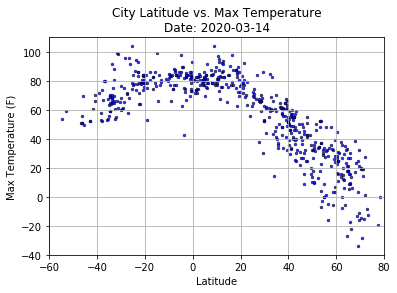

In [12]:
# Define data to plot
x_axis_lat_temp = main_df['Latitude']
y_axis_lat_temp = main_df['Max Temp']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(round_dn(x_axis_lat_temp.min()),\
         round_up(x_axis_lat_temp.max()))
plt.ylim(round_dn(y_axis_lat_temp.min()),\
         round_up(y_axis_lat_temp.max()))
plt.title(f"City Latitude vs. Max Temperature\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_temp, y_axis_lat_temp, linewidths=0.5, \
            marker ='o', facecolors='b', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_temp.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Humidity Plot

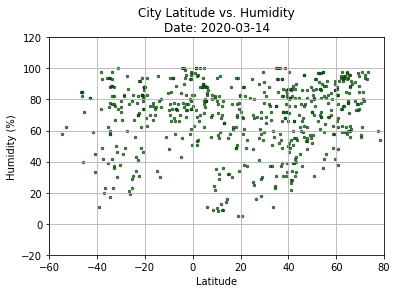

In [13]:
# Define data to plot
x_axis_lat_humd = main_df['Latitude']
y_axis_lat_humd = main_df['Humidity']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(round_dn(x_axis_lat_humd.min()),\
         round_up(x_axis_lat_humd.max()))
plt.ylim(round_dn(y_axis_lat_humd.min()) - 20,\
         round_up(y_axis_lat_humd.max()) + 20)
plt.title(f"City Latitude vs. Humidity\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_humd, y_axis_lat_humd, linewidths=0.5, \
            marker ='o', facecolors='g', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_humd.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Cloudiness Plot

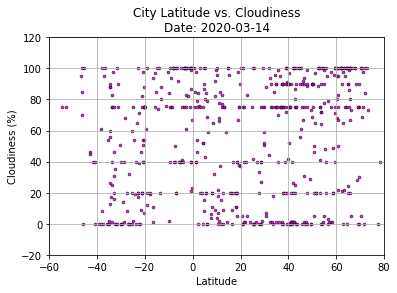

In [14]:
# define data to plot
x_axis_lat_cld = main_df['Latitude']
y_axis_lat_cld = main_df['Cloudiness']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(round_dn(x_axis_lat_cld.min()),\
         round_up(x_axis_lat_cld.max()))
plt.ylim(round_dn(y_axis_lat_cld.min()) - 20,\
         round_up(y_axis_lat_cld.max()) + 20)
plt.title(f"City Latitude vs. Cloudiness\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_cld, y_axis_lat_cld, linewidths=0.5, \
            marker ='o', facecolors = 'm', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_cld.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Wind Speed Plot

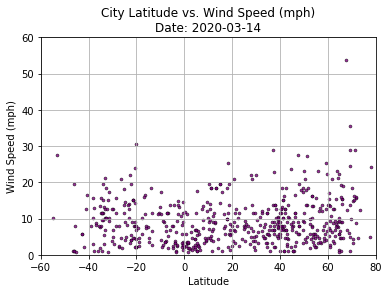

In [15]:
# define data to plot
x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(round_dn(x_axis_lat_wnspd.min()),\
         round_up(x_axis_lat_wnspd.max()))
plt.ylim(round_dn(y_axis_lat_wnspd.min()),\
         round_up(y_axis_lat_wnspd.max()))
plt.title(f"City Latitude vs. Wind Speed (mph)\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_wnspd, y_axis_lat_wnspd, linewidths=0.5, \
            marker ='o', facecolors = 'purple', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_wnspd.name
plt.savefig(file_name)
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
# Print out the r-squared value along with the plot.
def lin_regr (x_lin, y_lin, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_lin, y_lin)
    
     # print r-sqr values
    print('---------------------------------------------')
    print(f"The r-squared value is: \033[1;34m{round(rvalue, 2)}\033[00m") 
    
    # regression equation
    regress_values = x_lin * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'Linear Regression: \033[1;31m{line_eq}\033[00m')
    print('---------------------------------------------')
    
    # create plot parameters
    plt.scatter(x_lin, y_lin, linewidths=0.5, \
            marker ='o', facecolors = 'g', edgecolors = 'k',\
            alpha = 0.8, s = 10)
    plt.plot(x_lin,regress_values,"r-", )
    x_var_mean = x_lin.median()
    y_var_mean = (y_lin.mean() + y_lin.max()) /2
    plt.annotate(line_eq,
                 xy = (x_var_mean, y_var_mean),
                 xycoords='data',
                 xytext=(5, -5),
                 va='bottom',
                 textcoords='offset points', 
                 fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle = "-", linewidth = 0.3)
    
    
    # print correct hemisphere region for chart name and title based on latitude
    if x_lin.mean() < 0:   # South hemisphere : negative latitudes
        title =  f'Southern Hemisphere | Date: {today}\n{x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Southern_" + y_lin.name
        plt.savefig(file_name)
                 
    else:
        title =  f'Northern Hemisphere | Date: {today}\n{x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Northern_" + y_lin.name
        plt.savefig(file_name)  

---------------------------------------------
The r-squared value is: 0.12
Linear Regression: y = 0.02x + 8.63
---------------------------------------------


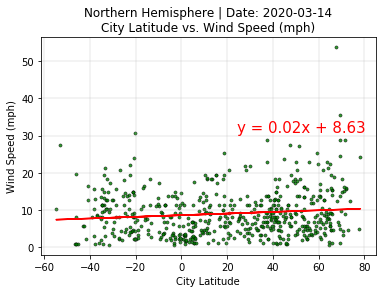

In [17]:
# TEST if the function is working

x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

lin_regr (x_axis_lat_wnspd, y_axis_lat_wnspd, x_label, y_label)

# Delete the trial run picture after verifying
import os
try:
    os.remove("Images/" + "Southern_" + y_axis_lat_wnspd.name + ".png")
except: 
    os.remove("Images/" + "Northern_" + y_axis_lat_wnspd.name + ".png")


In [18]:
# Create Northern and Southern Hemisphere DataFrames
nth_hem_df = main_df.loc[main_df["Latitude"] > 0, :]
nth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
1,1,US,1584212749,37.10,-113.58,75,54,61.00,13.87
5,5,TM,1584212936,39.21,54.59,100,31,67.80,9.26
7,7,ES,1584212936,27.91,-15.45,20,55,66.20,21.92
8,8,NO,1584212892,70.37,31.11,100,78,19.56,14.85
9,9,RU,1584212937,59.38,143.30,100,86,3.36,8.72
...,...,...,...,...,...,...,...,...,...
563,563,RU,1584213029,54.34,101.50,100,98,28.74,2.75
564,564,RU,1584213029,52.69,47.14,100,91,34.68,8.37
565,565,RU,1584213030,56.26,51.28,95,92,32.52,4.54
567,567,RU,1584213030,52.72,47.62,100,97,34.68,5.82


In [19]:
sth_hem_df = main_df.loc[main_df["Latitude"] < 0, :]
sth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,AU,1584212918,-33.65,115.33,83,98,66.00,13.27
2,2,ZA,1584212935,-34.42,19.23,26,88,64.99,1.01
3,3,AR,1584212845,-54.80,-68.30,75,58,53.60,10.29
4,4,NZ,1584212826,-46.19,168.86,85,85,51.01,1.01
6,6,MU,1584212888,-20.34,57.76,75,88,78.80,2.24
...,...,...,...,...,...,...,...,...,...
551,551,AR,1584212859,-40.81,-63.00,0,33,69.96,16.37
552,552,MG,1584213027,-21.67,45.17,9,62,77.70,9.01
553,553,AR,1584213028,-45.87,-67.50,0,40,69.80,8.05
562,562,NA,1584213029,-22.45,18.97,71,31,78.80,19.46


In [20]:
# Verify data integrity after splitting

if len(main_df.index) == len(sth_hem_df.index) + len(nth_hem_df.index):
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(main_df.index) - len(sth_hem_df.index) + len(nth_hem_df.index)} records.')

All records are accounted for.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.89
Linear Regression: y = -1.23x + 95.02
---------------------------------------------


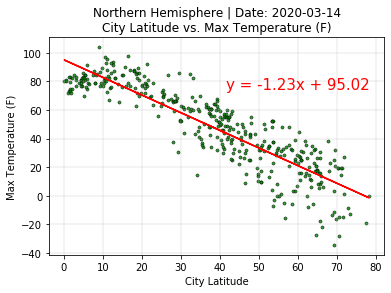

In [21]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.54
Linear Regression: y = 0.48x + 85.32
---------------------------------------------


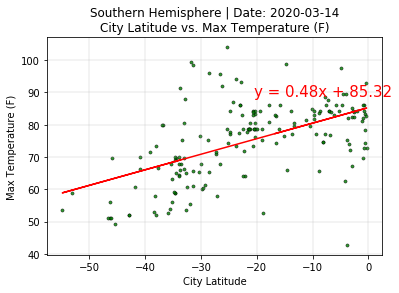

In [22]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.21
Linear Regression: y = 0.22x + 60.06
---------------------------------------------


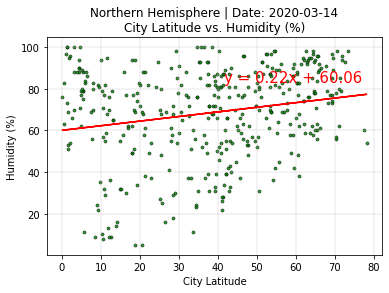

In [23]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.26
Linear Regression: y = 0.4x + 78.91
---------------------------------------------


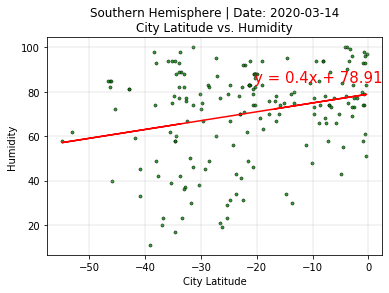

In [24]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.19
Linear Regression: y = 0.34x + 42.14
---------------------------------------------


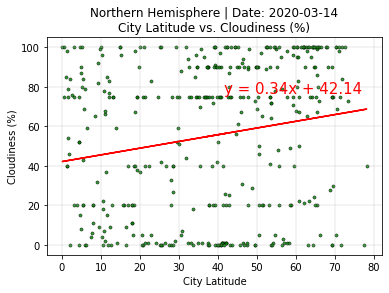

In [25]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.31
Linear Regression: y = 0.83x + 71.04
---------------------------------------------


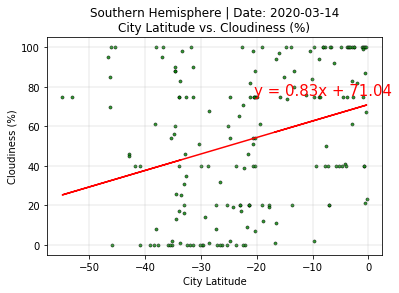

In [26]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.24
Linear Regression: y = 0.07x + 6.42
---------------------------------------------


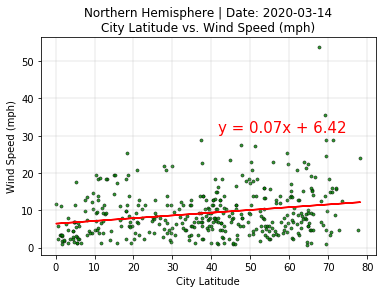

In [27]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.17
Linear Regression: y = -0.07x + 7.13
---------------------------------------------


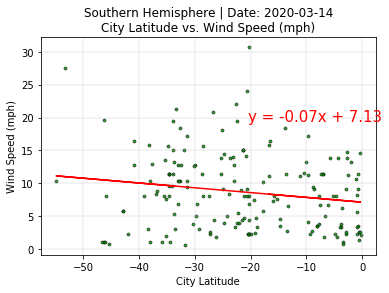

In [28]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )